## 1. Introduction

Machine learning systems are widely used tool for financial institutions to assess the creditworthiness of loan applicants. This evaluation is based on personal information provided by the applicant and infromation from credit records, which is then used to predict the likelihood of future defaults on credit card borrowing. Using this prediction, the bank decides whether to approve or reject credit card approval. These machine learning systems objectively quantify the credit risk associated with a particular applicant and provides a standard measure for credit risk assessment. Likewise, in this project, we will be using a Kaggle dataset (https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) to classify the approval or rejection of credit card applications for applicants. The primary objective of this project is to build a machine learning model that accurately predicts whether a credit card application will be approved or rejected.

## 2. Methodology

In this Jupyter notebook, I conducted an extensive analysis of the data, including exploring its characteristics, splitting it into training, validation, and testing sets, and pre-processing it for ML modeling. I employed various data pre-processing techniques such as binary encoding, one hot encoding, and feature scaling to ensure optimal performance of the models. Then, I identified the best algorithm and its corresponding hyper-parameters using random search CV with 3 fold cross validation. In this project, precision, recall, and F1 score were used to evaluate the model performance. 

## 3. Development of the Credit Card Approval Prediction ML Model

### 3.1 Import Libraries

In [1]:
# data manipulation
import pandas as pd

# mathematical functions
import numpy as np
from scipy.stats import randint, uniform
import random

# data visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.subplots as sp
from plotly.subplots import make_subplots

# data splitting
from sklearn.model_selection import train_test_split

# data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# model training requirements
import warnings
from sklearn.model_selection import RandomizedSearchCV, KFold

# model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# save model
import joblib

### 3.2 Data Collection

In this section dataset containing applicant information and dataset containing credit records are collected.

In [2]:
# gathering dataset for building prediction model
df1 = pd.read_csv("C:/Users/aswinram/Aswin's Data Science Portfolio/Credit Card Approval Prediction/data/application_record.csv")

# remove spaces in columns name
df1.columns = df1.columns.str.replace(' ','_')

# print shape of df
print("The shape of df1:", df1.shape)

df1.head()

The shape of df1: (438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
# gathering dataset for building prediction model
df2 = pd.read_csv("C:/Users/aswinram/Aswin's Data Science Portfolio/Credit Card Approval Prediction/data/credit_record.csv")

# remove spaces in columns name
df2.columns = df2.columns.str.replace(' ','_')

# print shape of df
print("The shape of df2:", df2.shape)

df2.head()

The shape of df2: (1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


### 3.3 Data Preprocessing I

Data preprocessing is an essential step in machine learning that involves transforming raw data into a format suitable for modeling. The process includes data cleaning, feature engineering, feature scaling, and feature selection. In Data preprocessing I, data is preprocessed to suit the needs of the project before data splitting. Later, in Data Preprocessing II, certain stragies are adopted to enrich the data further for predictive modeling.

##### Merge the "application_record" & "credit_record" DataFrames

In [4]:
# perform inner join on ID column
df = pd.merge(df1, df2, on='ID', how='outer')

# print shape of df
print("The shape of df:", df.shape)

df.head()

The shape of df: (1450675, 20)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4.0,C


##### Annotate the DataFrame

The merged DataFrame does not have any lables. Therefore, we annotate this dataframe using the following rationale: Customers with status 0-5 are typically considered bad for banks as they represent delinquent loans (Deny), indicating that the borrower is struggling to make timely payments. Customers with status C (Approve) are good for banks as they represent loans that have been paid off in full for the month , indicating responsible borrowing behavior. Customers with status X (Approve) have no loan for the month and do not affect the bank's risk. However, in the real world, more robust strategies must be employed based on expert opinion to annotate the labels.

In [5]:
# Define a function to map the status values to the 3 categories
def map_status(STATUS):
    if STATUS in ['0', '1', '2', '3', '4', '5']:
        return 0 # Deny
    elif STATUS in ['C', 'X']:
        return 1 # Approve
    else:
        return np.nan

# Replace the status column with the mapped values
df["STATUS"] = df["STATUS"].apply(map_status)

df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0.0,1.0
1,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-1.0,1.0
2,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-2.0,1.0
3,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-3.0,1.0
4,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4.0,1.0


##### Feature Engineering

Feature engineering is the process of creating new features from existing ones. This can be done by combining, transforming, or extracting information from features. Novel features can improve the performance of machine learning models by capturing nonlinear relationships, incorporating domain knowledge, or extracting information from text or categorical features. In this sub-section, some useful features are extracted to improve the performance of predictive modeling, however, these features did not significantly affect the ML model performance. Therefore, the engineered feautures are not used in the final model.

In [6]:
# engineering novel meaningful features from avaialble features

# Count of children to count of family members ratio
# df['CNT_CHILDREN_TO_CNT_FAM_MEMBERS_RATIO'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS']

# Income per family member
# df['INCOME_PER_FAMILIY_MEMBER_RATIO'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']

# Employment stability
# df['EMPLOYMENT_STABILITY_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']

##### Feature Recognition

This sub-section aims to improve the feature recognition process. It involves:

 1. Identifying the target feature - The feature that the model aims to predict.
 
 <br>
 
 2. Grouping input features - The input features are grouped into different categories based on their data type or characteristics, including:

   - All features: inlcludes all the input features
   
   - Numeric features: features that represent numerical values such as age, price, days, etc.  
   
   - Categorical features: features that represent discrete values such as make, policy type, marital status, etc.
   
   Moreover, numeric and categorical features can further be broke down as follows:
   
       - Continuous numeric features: features that are continous in nature.
    
       - Binary features: features that represent only two possible values such as police report filed, witness present, etc.

       - Ordinal features: categorical features that have a natural order such as driver rating.

       - Nominal features: categorical features that have no natural order such as make, agent type, etc.

       - High cardinality features: categorical features that have a large number of unique values such as policy number.
    
By grouping the features into different categories, it can help to identify which features may require additional preprocessing or encoding to be used effectively in a model. It can also help to guide the feature engineering process and the feature selection process.

In [7]:
# -----TARGET SELECTION-----

# Output Feature
target_feature = "STATUS"
print("Target Feature: \n", target_feature)
print()



# -----INPUT FEATURE RECOGNITION-----


# -----all features-----
all_features = df.columns.to_list()
print('All Features: \n', all_features)
print()


# -----numeric features-----
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object' and df[feature].dtype !='datetime64[ns]']
print('Numeric Features: \n', numeric_features)
print()


# -----categorical features-----
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print('Categorical Features: \n', categorical_features)
print()


# -----contionus numieric features-----
continuous_numeric_features = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
print('Continuous Numeric Features: \n', continuous_numeric_features)
print()


# -----binary features-----
binary_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 
                   'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
df[binary_features] = df[binary_features].astype('object')
print('Binary Features: \n', binary_features)
print()


# -----ordinal features-----
ordinal_features = []
print('Ordinal Features: \n', ordinal_features)
print()


# -----nominal features-----
nominal_features = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
print('Nominal Features: ', nominal_features)
print()


# -----high cardinality features-----

# Set the threshold for high cardinality
threshold = 7

# Calculate the number of unique values in each column
cardinality = df[categorical_features].nunique()

# Select the columns where the number of unique values is greater than the threshold
high_cardinality_features = cardinality[cardinality > threshold].index.tolist()

print('High cardinality features: ', high_cardinality_features)
print()

Target Feature: 
 STATUS

All Features: 
 ['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']

Numeric Features: 
 ['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']

Categorical Features: 
 ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

Continuous Numeric Features: 
 ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

Binary Features: 
 ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

Ordinal Features: 
 

##### Data Cleaning

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and other issues in a dataset. It is an essential step in data preprocessing before analysis or modeling. In this project, we clean the data before data splitting because it helps to ensure that the training, validation, and test sets are representative of the underlying population and are not biased or skewed by errors or inconsistencies in the data.

In [8]:
# print the shape of the df
print("The shape of the df :", df.shape)
print()

# find missing values by column
print("The smissing values in the df :")
print(df.isnull().sum())

The shape of the df : (1450675, 20)

The smissing values in the df :
ID                          0
CODE_GENDER            270860
FLAG_OWN_CAR           270860
FLAG_OWN_REALTY        270860
CNT_CHILDREN           270860
AMT_INCOME_TOTAL       270860
NAME_INCOME_TYPE       270860
NAME_EDUCATION_TYPE    270860
NAME_FAMILY_STATUS     270860
NAME_HOUSING_TYPE      270860
DAYS_BIRTH             270860
DAYS_EMPLOYED          270860
FLAG_MOBIL             270860
FLAG_WORK_PHONE        270860
FLAG_PHONE             270860
FLAG_EMAIL             270860
OCCUPATION_TYPE        633788
CNT_FAM_MEMBERS        270860
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64


During data cleaning, missing data is typically handled through data imputation techniques such as replacing missing values with the mean, median, or mode of the corresponding feature. However, in our case, the missing data is systemic for a large proportion of the records in the dataset. Therefore, we discard the missing data before moving to the next stage. Additionally, we remove the ID feature as it is not a useful for credit card approval prediction for new customers.

In [9]:
# remove rows with missing values for the specified columns
df = df.dropna(subset= ['STATUS', 'CODE_GENDER'])

# remove Occupation Type column because it has many missing values
df = df.drop(columns = ['OCCUPATION_TYPE'])

# remove ID as it is not useful for credit card approval prediction for new customers
df = df.drop(columns = ['ID'])

# print the shape of the df
print("The shape of the cleaned df :", df.shape)
print()

The shape of the cleaned df : (777715, 18)



In [10]:
print(df.isnull().sum())

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64


### 3.4 Exploratory Data Analysis

Exploratory Data Analysis (EDA) plays a crucial role in enhancing the performance of machine learning models. It helps in identifying errors, detecting patterns, selecting relevant features, and improving model accuracy. In this section, graphical charts are are created for critical features. This step provides essential insights into the data and assists in making informed decisions for the subsequent stages of the model development process.

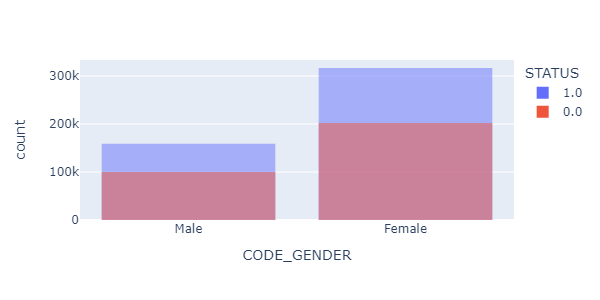

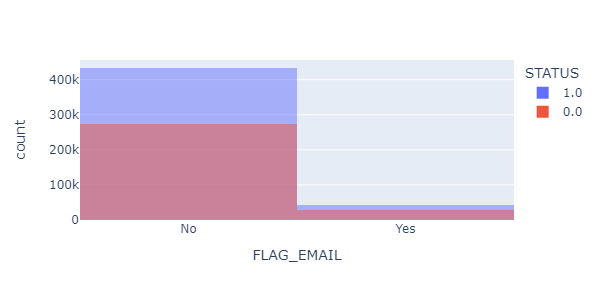

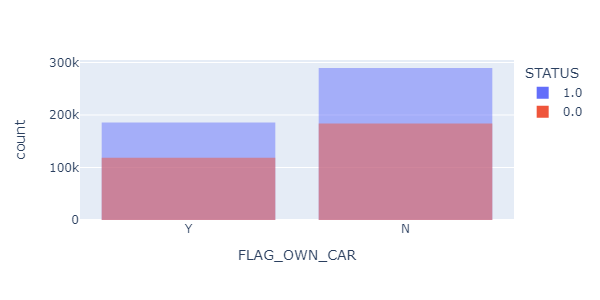

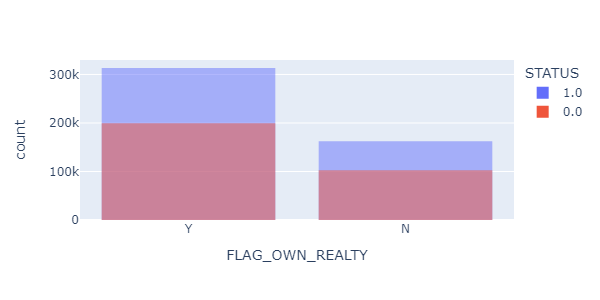

In [37]:
# charts for critical input features
fig = px.histogram(df, x='CODE_GENDER', color=target_feature, barmode="overlay", width = 600, height = 300)
fig.update_layout(xaxis=dict(tickvals=['M', 'F'], ticktext=['Male', 'Female']))
fig.show("png")

fig = px.histogram(df, x='FLAG_EMAIL', color=target_feature, barmode="overlay", width = 600, height = 300)
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['No', 'Yes']))
fig.show("png")

fig = px.histogram(df, x='FLAG_OWN_CAR', color=target_feature, barmode="overlay", width = 600, height = 300)
fig.show("png")

fig = px.histogram(df, x='FLAG_OWN_REALTY', color=target_feature, barmode="overlay", width = 600, height = 300)
fig.show("png")


# chart for target_feature
fig = px.pie(df, values=df.groupby('STATUS').size().values, names=df.groupby('STATUS').size().index)
fig.update_layout( title="Visualizing Data Imbalance in Target Feature", width=600, height=400)
fig.show()

### 3.5 Data Splitting

Data splitting into train, validation, and test sets is important for machine learning to avoid overfitting and ensure model generazability. In addition, Feature selection an important step in Data Preprocessing is intertwined with data splitting for efficiency.

In [12]:
# Assign input features (also for feature selection)
X = df[['CODE_GENDER', 'FLAG_EMAIL', 'FLAG_MOBIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
        'FLAG_PHONE', 'FLAG_WORK_PHONE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
        'NAME_INCOME_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']]

# Assign Target Feature
y = df[target_feature]


# Perform stratified train_val-test split for input features
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.10,  random_state=0)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.11,  random_state=0)


# Print shapes of the datasets
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_val: ', X_val.shape)
print('Shape of y_val: ', y_val.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)
print()

# Dataset Splitting Summary
total_samples = X_train.shape[0] + X_val.shape[0] + X_test.shape[0]

train_percent =  X_train.shape[0] / total_samples * 100
val_percent = X_val.shape[0] / total_samples * 100
test_percent = X_test.shape[0] / total_samples * 100

print(f"Training set percentage: {train_percent:.0f}%")
print(f"Validation set percentage: {val_percent:.0f}%")
print(f"Test set percentage: {test_percent:.0f}%")

Shape of X_train:  (622949, 15)
Shape of y_train:  (622949,)
Shape of X_val:  (76994, 15)
Shape of y_val:  (76994,)
Shape of X_test:  (77772, 15)
Shape of y_test:  (77772,)

Training set percentage: 80%
Validation set percentage: 10%
Test set percentage: 10%


### 3.6 Data preprocessing II

Data Preprocessing I is done before data splitting to ensure that the entire dataset is clean, consistent, and in the appropriate format. Data preprocessing II is done after data splitting to manipulate features on the training, validation, and test sets, thereby enriching the dataset for predictive modeling.

##### Feature Engineering using Encoding techniques

Feature engineering is crucial for machine learning modeling. In my approach, I utilized different encoding techniques such as count encoder for high cardinality features, binary encoder for binary features, and one hot encoder for nominal features to preprocess the features for improved model performance.

In [13]:
# Create an instance of CountEncoder 
c_encoder = ce.CountEncoder()

# get updated high cardinality feature names
high_cardinality_features = np.intersect1d(high_cardinality_features, X_train.columns)

# check if high_cardinality_features are available then apply count encoder to X_train, X_val, and X_test
if high_cardinality_features.size == 0:
    print('Note: High cardinality features Unavailable!')
    X_train_c_encoded, X_val_c_encoded, X_test_c_encoded = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
else:
    # fit_transform object on train set and transform on test set
    X_train_c_encoded, X_val_c_encoded, X_test_c_encoded = c_encoder.fit_transform(X_train[high_cardinality_features]), c_encoder.transform(X_val[high_cardinality_features]), c_encoder.transform(X_test[high_cardinality_features])

Note: High cardinality features Unavailable!


In [14]:
# Create an instance of BinaryEncoder
b_encoder = BinaryEncoder()

# get updated binary feature names
binary_features = np.intersect1d(binary_features, X_train.columns)

# check if binary_features are available then apply binary encoder to X_train, X_val, and X_test
if binary_features.size == 0:
    print('Note: Binary features Unavailable!')
    X_train_b_encoded, X_val_b_encoded, X_test_b_encoded = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
else:
    # fit_transform object on train set and transform on test set
    X_train_b_encoded, X_val_b_encoded, X_test_b_encoded = b_encoder.fit_transform(X_train[binary_features]), b_encoder.transform(X_val[binary_features]), b_encoder.transform(X_test[binary_features])

In [16]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore')

# get updated nominal feature names
nominal_features = np.intersect1d(nominal_features, X_train.columns)

# check if nominal_features are available then apply one hot encoder to X_train, X_val, and X_test
if nominal_features.size == 0:
    print('Note: Nominal features Unavailable!')
    X_train_o_encoded, X_val_o_encoded, X_test_o_encoded = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
else:
    # fit_transform object on train set and transform on test set
    X_train_o_encoded, X_val_o_encoded, X_test_o_encoded = encoder.fit_transform(X_train[nominal_features]), encoder.transform(X_val[nominal_features]), encoder.transform(X_test[nominal_features])

    # Get the names of the nominal columns
    column_names = encoder.get_feature_names_out(nominal_features)

    # convert X_train_encoded, X_val_encoded, X_test_encoded to dense numpy array
    X_train_o_encoded, X_val_o_encoded, X_test_o_encoded = X_train_o_encoded.toarray(), X_val_o_encoded.toarray(), X_test_o_encoded.toarray()

    # convert X_train_encoded, X_val_encoded, X_test_encoded dense numpy array to DataFrame
    X_train_o_encoded, X_val_o_encoded, X_test_o_encoded = pd.DataFrame(X_train_o_encoded, columns=column_names), pd.DataFrame(X_val_o_encoded, columns=column_names), pd.DataFrame(X_test_o_encoded, columns=column_names)

In [17]:
# Combine the encoded DataFrames

# Reset the index of each DataFrame
X_train_c_encoded, X_train_b_encoded, X_train_o_encoded = X_train_c_encoded.reset_index(drop=True), X_train_b_encoded.reset_index(drop=True), X_train_o_encoded.reset_index(drop=True)
X_val_c_encoded, X_val_b_encoded, X_val_o_encoded = X_val_c_encoded.reset_index(drop=True), X_val_b_encoded.reset_index(drop=True), X_val_o_encoded.reset_index(drop=True)
X_test_c_encoded, X_test_b_encoded, X_test_o_encoded = X_test_c_encoded.reset_index(drop=True), X_test_b_encoded.reset_index(drop=True), X_test_o_encoded.reset_index(drop=True)

# Combine the encoded DataFrames using pd.concat
X_train_encoded = pd.concat([X_train_c_encoded, X_train_b_encoded, X_train_o_encoded], axis=1)
X_val_encoded = pd.concat([X_val_c_encoded, X_val_b_encoded, X_val_o_encoded], axis=1)
X_test_encoded = pd.concat([X_test_c_encoded, X_test_b_encoded, X_test_o_encoded], axis=1)

##### Feature Scaling

Feature scaling is important for machine learning modeling as it transforms the features to a common scale, ensuring that no single feature dominates the others during model training. Scaling can help improve model performance by reducing the impact of the differences in feature scales, which can otherwise lead to biased results. In this jupyter notebook, I have used sklearn's StandardScaler to perform the feature scaling on the X_train_encoded, X_val_encoded, X_test_encoded datasets.

In [18]:
# Create an instance of StandardScaler
scaler = StandardScaler(with_mean=False)

# Convert column names to set
all_features = set(X_train.columns)

# Create sets of high cardinality, binary, and nominal features
hc_features = set(high_cardinality_features)
binary_features = set(binary_features)
nominal_features = set(nominal_features)

# Find the set of features that are not in any of the three sets
numeric_features = all_features - hc_features - binary_features - nominal_features

# convert numeric_features to list
numeric_features = np.array(list(numeric_features))

# check if nominal_features are available then apply scaler to X_train, X_val, and X_test
if numeric_features.size == 0:
    print('Numeric features Unavailable!')
    X_train_scaled, X_val_scaled, X_test_scaled = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
else:
    # fit_transform object on train set and transform on test set
    X_train_scaled, X_val_scaled, X_test_scaled = scaler.fit_transform(X_train[numeric_features]), scaler.transform(X_val[numeric_features]), scaler.transform(X_test[numeric_features])

    # convert X_train_scaled, X_val_scaled, X_test_scaled numpy array to DataFrame
    X_train_scaled, X_val_scaled, X_test_scaled = pd.DataFrame(X_train_scaled, columns=numeric_features), pd.DataFrame(X_val_scaled, columns=numeric_features), pd.DataFrame(X_test_scaled, columns=numeric_features)

In [19]:
# update the scaled dataframe by concatenating with encoded dfs
X_train_scaled = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_val_scaled = pd.concat([X_val_encoded, X_val_scaled], axis=1)
X_test_scaled = pd.concat([X_test_encoded, X_test_scaled], axis=1)

##### Data augmentation using SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a popular data augmentation technique that is commonly used to address class imbalance in machine learning. SMOTE works by creating synthetic examples of the minority class by interpolating new data points along lines between existing minority class data points. It is important to apply SMOTE only to the training set because the goal of SMOTE is to increase the number of examples in the minority class to prevent the model from being biased towards the majority class. However, SMOTE is not used for the final model since the ML model performs better without SMOTE.

##### Feature Engineering using Clustering

The reason for performing clustering feature engineering after encoding, scaling, and SMOTE is that clustering algorithms are sensitive to the scale and distribution of features, and they may not work well with categorical variables or class imbalance. By applying encoding, scaling, and SMOTE beforehand, you can ensure that the input to the clustering algorithm is appropriate and yields meaningful results. But, for our dataset, feature engineering using clustering did not improve model performance.

In [22]:
# Choose the number of clusters to create
#n_clusters = 4

# Fit K-means to the training data
#kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#kmeans.fit(X_train_scaled)

# Obtain the cluster labels for each sample in the training, validation, and test data
#train_labels = kmeans.labels_
#val_labels = kmeans.predict(X_val_scaled)
#test_labels = kmeans.predict(X_test_scaled)

# Add the cluster label column to each dataframe
#X_train_scaled['cluster_label'] = train_labels
#X_val_scaled['cluster_label'] = val_labels
#X_test_scaled['cluster_label'] = test_labels

### 3.7 Model Training & Evaluation

Model training involves selecting an appropriate algorithm and fine-tuning its parameters to obtain the best possible model for a given dataset. In this case, logistic regression, and random forest classifers were trained and fine-tuned using random search CV. The best model selected based on cross-validation performance was then trained on the entire train set and evaluated on the validation set. Once the model was optimized, it was evaluated on the test set to ensure that it generalizes well to unseen data.

During model training, it is essential to monitor for underfitting and overfitting. Underfitting occurs when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both the training and validation sets. Overfitting, on the other hand, occurs when a model is too complex and captures noise in the training data, leading to excellent performance on the training set but poor performance on the validation set.

To ensure good performance on the test set, it is crucial to select a model that achieves a balance between underfitting and overfitting. The selected model should have good performance on both the training and validation sets while also generalizing well to the test set. A model that achieves good performance on the test set is likely to perform well on new, unseen data, and is considered to be a good model. This section aims to achieve such a model.

##### Model definition & Hyperparameter tuning with Random Search CV

In [23]:
# define the models and hyperparameter search spaces
models = {
    'lr': {
        'model': LogisticRegression(random_state=0),
        'param_distributions': {
            # Regularization strength
            'C': np.logspace(-10, 10, 21),
            # Solver for optimization
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
            # Maximum number of iterations
            'max_iter': randint(100, 1000),
        }
    },
    
    'rf': {
        'model': RandomForestClassifier(random_state=0),
        'param_distributions': {
                # number of estimators
                'n_estimators': [25, 50],
                # Regularization parameter
                'max_features': ['sqrt', 'log2'],
                # Regularization parameter    
                'max_depth': [15, 25, 35, 50],
                # Regularization parameter    
                'min_samples_split': [2, 4, 8],
                # Regularization parameter    
                'min_samples_leaf': [2, 6, 8],
                # bootstrap strategy
                'bootstrap': [True, False]
        }
    }
}


# Define cross-validation method
cv = KFold(n_splits=3)

# Perform hyperparameter tuning on all models
best_models = {}
for name in models:
    print(f'{name}:')
    
    # ignore all warnings
    warnings.filterwarnings('ignore')
    
    # define the random search object
    random_search = RandomizedSearchCV(
        models[name]['model'],
        param_distributions=models[name]['param_distributions'],
        n_iter=3, 
        cv=cv,
        scoring='f1_macro',
        random_state=0)
    
    # perform hyperparameter tuning with random search
    random_search.fit(X_train_scaled, y_train)
    
    # get the best model and its hyperparameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    # store the best model in the dictionary
    best_models[name] = {'model': best_model, 'params': best_params}

    # print best hyperparameters and best score
    print(f'Best hyperparameters: {random_search.best_params_}')
    print(f'Best f1 score: {random_search.best_score_:.3f}')
    print()

lr:
Best hyperparameters: {'C': 100.0, 'max_iter': 659, 'solver': 'lbfgs'}
Best f1 score: 0.380

rf:
Best hyperparameters: {'n_estimators': 25, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 35, 'bootstrap': True}
Best f1 score: 0.676



##### Identify the best model using random search results

In [24]:
# get best model name and score
best_model = best_models['rf']['model']

print('Best Model:', best_model)

Best Model: RandomForestClassifier(max_depth=35, max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=25, random_state=0)


##### Model performance on Entire Train Set

In [25]:
# fit model on entire train set
best_model.fit(X_train_scaled, y_train)

# predict model on train set
y_pred_train = best_model.predict(X_train_scaled)

# Generate the classification report
report = classification_report(y_train, y_pred_train)

# Print the report
print(report)

              precision    recall  f1-score   support

         0.0       0.70      0.50      0.58    241981
         1.0       0.73      0.87      0.79    380968

    accuracy                           0.72    622949
   macro avg       0.72      0.68      0.69    622949
weighted avg       0.72      0.72      0.71    622949



##### Model performance on Validation Set

In [26]:
# predict model on train set
y_pred_val = best_model.predict(X_val_scaled)

# Generate the classification report
report = classification_report(y_val, y_pred_val)

# Print the report
print(report)

              precision    recall  f1-score   support

         0.0       0.69      0.49      0.57     29979
         1.0       0.72      0.86      0.79     47015

    accuracy                           0.71     76994
   macro avg       0.71      0.67      0.68     76994
weighted avg       0.71      0.71      0.70     76994



##### Feature Importance for the best model

Analyzing feature importances is important for selecting the best subset of features because it helps us identify the features that contribute most to the model's predictive performance. By selecting only the most informative features, we can improve the model's accuracy and reduce its complexity, making it easier to interpret and more efficient to use. In this project, feature importance plots are generated for Random Foest to select a subset of the most informative features for use in the model. By analyzing the splits made in the decision trees of the Random Forest, we can identify the features that contribute most to the model's predictive performance.

In [27]:
# feature names
feature_names = X_val_scaled.columns

# Get the feature importances
importances = best_model.feature_importances_

# Get the indices that would sort the importances in ascending order
sorted_indices = np.argsort(importances)

# Reverse the order of the sorted indices to get descending order
descending_indices = sorted_indices[::-1]

# Sort the importances and feature names in descending order
importances_descending = importances[descending_indices]
feature_names_descending = feature_names[descending_indices]

# Create a bar chart of the feature importances
fig = go.Figure(
    data=[go.Bar(x=feature_names, y=importances_descending)],
    layout=go.Layout(title="Feature Importances")
)

# Show the chart
fig.show()

##### Model performance on Test Set

In [28]:
# predict model on test set
y_pred_test = best_model.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred_test)

# Print the report
print(report)

              precision    recall  f1-score   support

         0.0       0.69      0.49      0.57     30269
         1.0       0.72      0.86      0.79     47503

    accuracy                           0.71     77772
   macro avg       0.71      0.67      0.68     77772
weighted avg       0.71      0.71      0.70     77772



## 4. Conclusion

In this Jupyter notebook, we present the different stages of developing a machine learning model for predicting credit card approval. These stages include data preprocessing, model training and evaluation, and model interpretation. We evaluated two classifiers: logistic regression, and random forest. The random forest classifier model performed the best and was identified as the winning model. Moreover, it is important to note that the random forest classifier model does not overfit on the training set and it generalizes well on the test set.

Although our results demonstrate promising ML performance, there is room for improvement in model perfromance. This could be achieved by experimenting with additional data preprocessing steps, exploring a larger hyperparameter space, or experimenting with different algorithms. Nevertheless, this work highlights the potential value of ML in automating the credit card approval process, which could provide banks with a valuable tool.